In [10]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets  # For datasets
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVR, SVC
from sklearn.cluster import KMeans, MiniBatchKMeans

**Question 1**: Load the dataset in the file *bike.csv*. Check that the dataset has loaded properly.

In [12]:
# load relevant columns from the training data
bt_dates = np.genfromtxt('bike.csv', delimiter=',', skip_header=True, dtype=np.datetime64, usecols=0)
bt_others = np.genfromtxt('bike.csv', delimiter=',', skip_header=True, usecols=range(1, 9))
bt_target = np.genfromtxt('bike.csv', delimiter=',', skip_header=True, usecols=11)

In [18]:
bt_dates.astype('datetime64[D]') - bt_dates.astype('datetime64[M]')

array([ 0,  0,  0, ..., 18, 18, 18], dtype='timedelta64[D]')

**Question 2**: The first column in the dataset contains date and time values in *yyyy-mm-dd hh:mm:ss* format. Extract each component (year, month, day, hour) of this column in separate arrays.

In [47]:
year = bt_dates.astype('datetime64[Y]').astype(int) + 1970
month = (bt_dates.astype('datetime64[M]').astype(int) % 12) + 1
day = (bt_dates.astype('datetime64[D]') - bt_dates.astype('datetime64[M]')).astype(int) + 1
hour = (bt_dates.astype('datetime64[h]') - bt_dates.astype('datetime64[D]')).astype(int) + 1

**Question 3**: Concatenate all the features in this dataset into a single array.

In [50]:
x = np.concatenate([bt_others, year[:, None], month[:, None], day[:, None], hour[:, None]], axis=1)

**Question 4**: Build an SVM to predict the count of bikes rented each hour.

In [53]:
# split the dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, bt_target, test_size=0.2)

In [54]:
# train a support vector machine using the concrete strength dataset
# vary the hyperparameter settings to achieve best performance
svc_bsd = SVR()
svc_bsd.fit(x_train, y_train)

SVR()

In [55]:
# compute classification accuracy
clf_acc = svc_bsd.score(x_test, y_test)
print(clf_acc)

-0.06608249724659587


**Question 5**: Load the iris dataset. Split the data into training and testing. Use [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) to cluster the data. Set *n_clusters* to 3 for KMeans.

In [2]:
# load dataset
iris = datasets.load_iris()

In [3]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

In [5]:
km = KMeans(n_clusters=3)
km.fit(x_train)

KMeans(n_clusters=3)

**Question 6**: Compute classification performance of the model built using KMeans.

In [30]:
cluster_assoc = -1 * np.ones(3)

for i, cls in enumerate([0, 1, 2]):
    cluster_sample_cls = y_train[km.labels_ == cls] # class of each sample in the cluster
    cls_in_cluster, cls_count = np.unique(cluster_sample_cls, return_counts=True) # identify the number of samples from each class in the cluster
    cluster_assoc[i] = cls_in_cluster[np.argmax(cls_count)] # assign the most prominent class in the cluster as the class association of the cluster

In [34]:
np.sum(km.predict(x_test) == y_test) / y_test.size

0.9333333333333333

**Question 7**: Visualize the results of your clustering model by plotting two features of samples from the three clusters in different colors.

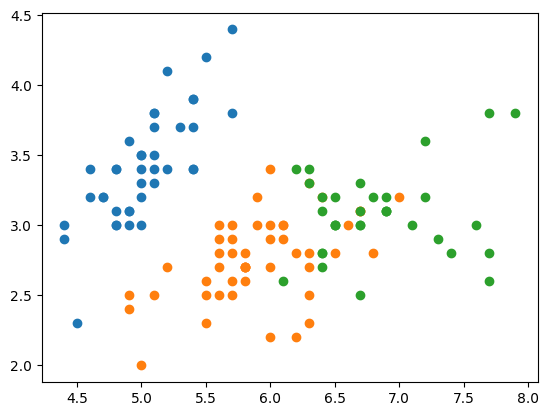

In [44]:
plt.plot(x_train[km.labels_ == 0, 0], x_train[km.labels_ == 0, 1], 'o')
plt.plot(x_train[km.labels_ == 1, 0], x_train[km.labels_ == 1, 1], 'o')
plt.plot(x_train[km.labels_ == 2, 0], x_train[km.labels_ == 2, 1], 'o')

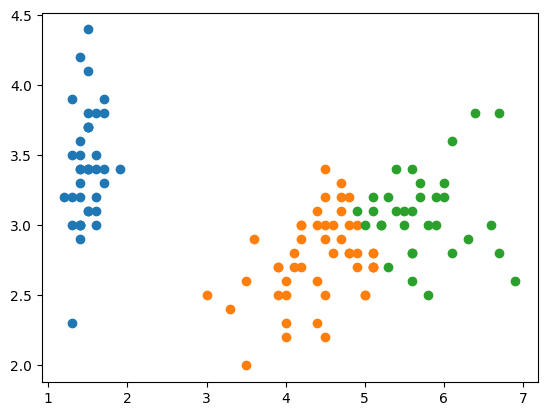

In [45]:
# A slightly better visualization
plt.plot(x_train[km.labels_ == 0, 2], x_train[km.labels_ == 0, 1], 'o')
plt.plot(x_train[km.labels_ == 1, 2], x_train[km.labels_ == 1, 1], 'o')
plt.plot(x_train[km.labels_ == 2, 2], x_train[km.labels_ == 2, 1], 'o')

**Question 8**: [MiniBatchKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html#sklearn.cluster.MiniBatchKMeans) is a form of KMeans that may be useful for processing larger datasets. Rather than iteratively processing a single sample at a time, MiniBatchKMeans processes multiple samples at a time. Repeat **Question 6** using MiniBatchKMeans. 

In [49]:
mbkm = MiniBatchKMeans(n_clusters=3, batch_size=3)
mbkm.fit(x_train)

MiniBatchKMeans(batch_size=3, n_clusters=3)

In [50]:
cluster_assoc = -1 * np.ones(3)

for i, cls in enumerate([0, 1, 2]):
    cluster_sample_cls = y_train[mbkm.labels_ == cls] # class of each sample in the cluster
    cls_in_cluster, cls_count = np.unique(cluster_sample_cls, return_counts=True) # identify the number of samples from each class in the cluster
    cluster_assoc[i] = cls_in_cluster[np.argmax(cls_count)] # assign the most prominent class in the cluster as the class association of the cluster

In [51]:
np.sum(mbkm.predict(x_test) == y_test) / y_test.size

0.9333333333333333

# References
1. [Bike demand dataset](https://www.kaggle.com/competitions/bike-sharing-demand/data?select=train.csv)
2. [About DateTime64 type](https://numpy.org/doc/stable/reference/arrays.datetime.html#datetime-units)
3. [Stackoverflow post on extracting components from DateTime64](https://stackoverflow.com/questions/13648774/get-year-month-or-day-from-numpy-datetime64)